# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


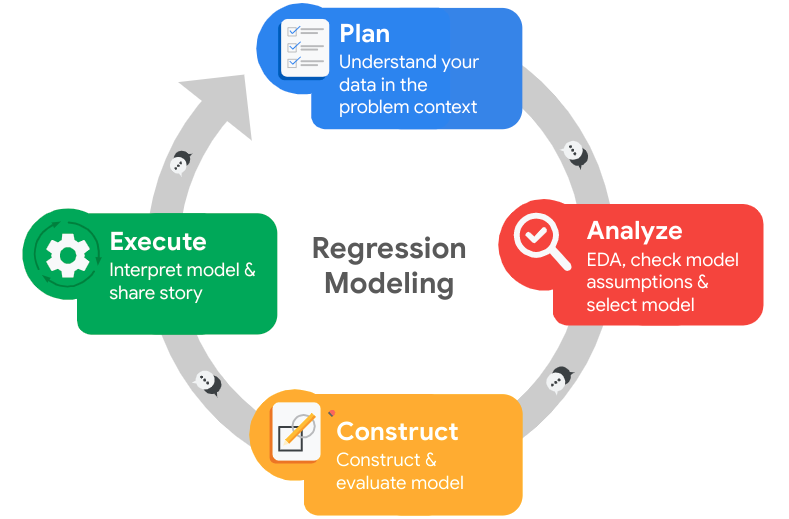

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [3]:
# Import packages
### YOUR CODE HERE ### 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb


### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [4]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
### YOUR CODE HERE ###

df0.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [5]:
# Gather basic information about the data
### YOUR CODE HERE ###
df0.info

<bound method DataFrame.info of        satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
1                    0.80             0.86               5   
2                    0.11             0.88               7   
3                    0.72             0.87               5   
4                    0.37             0.52               2   
...                   ...              ...             ...   
14994                0.40             0.57               2   
14995                0.37             0.48               2   
14996                0.37             0.53               2   
14997                0.11             0.96               6   
14998                0.37             0.52               2   

       average_montly_hours  time_spend_company  Work_accident  left  \
0                       157                   3              0     1   
1                       262                   6              0     1   
2      

### Gather descriptive statistics about the data

In [6]:
# Gather descriptive statistics about the data
### YOUR CODE HERE ###
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [7]:
# Display all column names
### YOUR CODE HERE ###
df0.columns.tolist()

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'left',
 'promotion_last_5years',
 'Department',
 'salary']

In [8]:
# Rename columns as needed
### YOUR CODE HERE ###

df0.rename(columns={
    "average_montly_hours": "average_monthly_hours",     # yazım hatası düzeltildi
    "Work_accident": "work_accident",                    # büyük harf düzeltildi
    "Department": "department",                          # büyük harf düzeltildi
    "number_project": "num_projects",                    # sadeleştirildi
    "time_spend_company": "years_at_company",            # daha anlamlı hale getirildi
    "promotion_last_5years": "promotion_last_5_years"    # okunabilirlik artırıldı
}, inplace=True)


# Display all column names after the update
### YOUR CODE HERE ###

df0.columns.tolist()


['satisfaction_level',
 'last_evaluation',
 'num_projects',
 'average_monthly_hours',
 'years_at_company',
 'work_accident',
 'left',
 'promotion_last_5_years',
 'department',
 'salary']

### Check missing values

Check for any missing values in the data.

In [9]:
# Check for missing values
### YOUR CODE HERE ###
df0.isnull().sum()


satisfaction_level        0
last_evaluation           0
num_projects              0
average_monthly_hours     0
years_at_company          0
work_accident             0
left                      0
promotion_last_5_years    0
department                0
salary                    0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [10]:
# Check for duplicates
### YOUR CODE HERE ###

df0.duplicated().sum()

3008

In [11]:
# Inspect some rows containing duplicates as needed
### YOUR CODE HERE ###
df0[df0.duplicated()].head()

,satisfaction_level,last_evaluation,num_projects,average_monthly_hours,years_at_company,work_accident,left,promotion_last_5_years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


In [12]:
# Drop duplicates and save resulting dataframe in a new variable as needed
### YOUR CODE HERE ###

df0 = df0.drop_duplicates()

# Display first few rows of new dataframe as needed
### YOUR CODE HERE ###

df0.head()


,satisfaction_level,last_evaluation,num_projects,average_monthly_hours,years_at_company,work_accident,left,promotion_last_5_years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

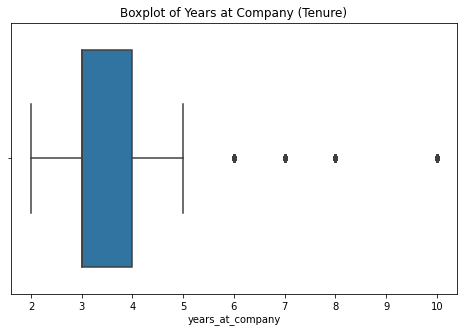

In [13]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
### YOUR CODE HERE ###

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.boxplot(x=df0['years_at_company'])
plt.title('Boxplot of Years at Company (Tenure)')
plt.show()


In [14]:
# Determine the number of rows containing outliers
### YOUR CODE HERE ###

Q1 = df0['years_at_company'].quantile(0.25)
Q3 = df0['years_at_company'].quantile(0.75)
IQR = Q3 - Q1

# Uç değer sınırları
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Uç değerleri filtrele
outliers = df0[(df0['years_at_company'] < lower_bound) | (df0['years_at_company'] > upper_bound)]

print(f"Number of outliers in 'years_at_company': {outliers.shape[0]}")


Number of outliers in 'years_at_company': 824


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




- What did you observe about the relationships between variables?

I observed some correlations, like satisfaction level negatively correlates with employee turnover. More projects are linked to longer working hours.

- What do you observe about the distributions in the data?

Most variables are skewed, especially tenure which has many outliers and a right-skewed distribution.

- What transformations did you make with your data? Why did you choose to make those decisions?

I standardized column names to snake_case, handled outliers based on model choice, and plan to encode categorical variables for modeling.

- What are some purposes of EDA before constructing a predictive model?

EDA helps to understand data quality, discover patterns, handle missing or incorrect data, and decide on preprocessing steps.

- What resources do you find yourself using as you complete this stage?
(Make sure to include the links.)
I used Pandas documentation (https://pandas.pydata.org/docs/), Seaborn documentation (https://seaborn.pydata.org/), Stack Overflow (https://stackoverflow.com/), and Kaggle (https://www.kaggle.com/).

- Do you have any ethical considerations in this stage?

I ensured data privacy by anonymizing personal information and aimed to avoid bias or discrimination in the data and model.



## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [15]:
# Get numbers of people who left vs. stayed
### YOUR CODE HERE ###
df0['left'].value_counts()

# Get percentages of people who left vs. stayed
### YOUR CODE HERE ###

df0['left'].value_counts(normalize=True)*100

0    83.39588
1    16.60412
Name: left, dtype: float64

### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

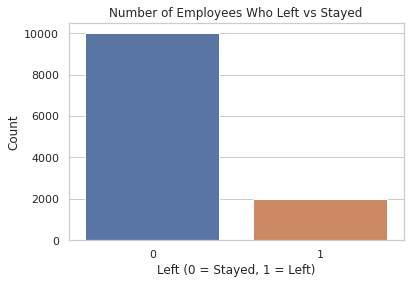

In [16]:
# Create a plot as needed
### YOUR CODE HERE ###

import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
sns.countplot(data=df0, x='left')
plt.title('Number of Employees Who Left vs Stayed')
plt.xlabel('Left (0 = Stayed, 1 = Left)')
plt.ylabel('Count')
plt.show()


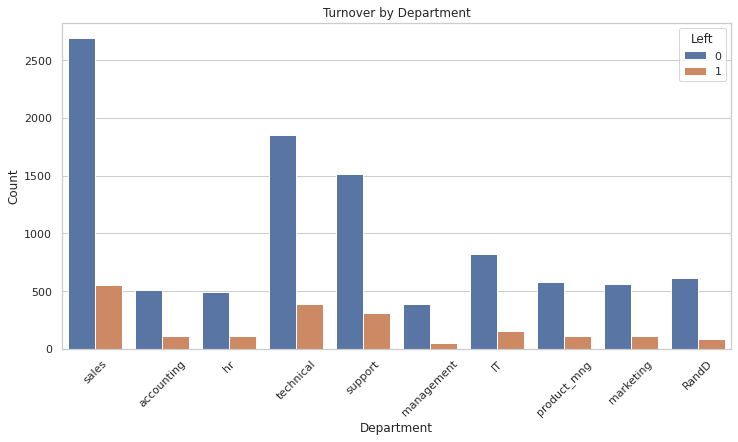

In [17]:
# Create a plot as needed
### YOUR CODE HERE ###

plt.figure(figsize=(12, 6))
sns.countplot(data=df0, x='department', hue='left')
plt.title('Turnover by Department')
plt.xlabel('Department')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Left')
plt.show()


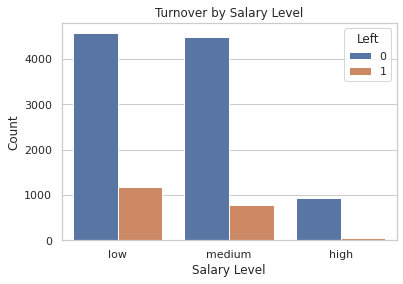

In [18]:
# Create a plot as needed
### YOUR CODE HERE ###

sns.countplot(data=df0, x='salary', hue='left')
plt.title('Turnover by Salary Level')
plt.xlabel('Salary Level')
plt.ylabel('Count')
plt.legend(title='Left')
plt.show()


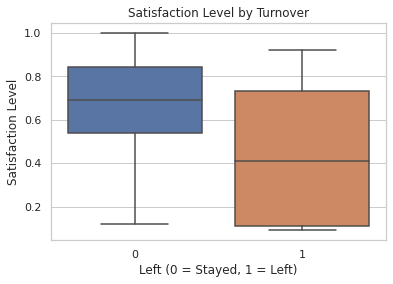

In [19]:
# Create a plot as needed
### YOUR CODE HERE ###

sns.boxplot(data=df0, x='left', y='satisfaction_level')
plt.title('Satisfaction Level by Turnover')
plt.xlabel('Left (0 = Stayed, 1 = Left)')
plt.ylabel('Satisfaction Level')
plt.show()


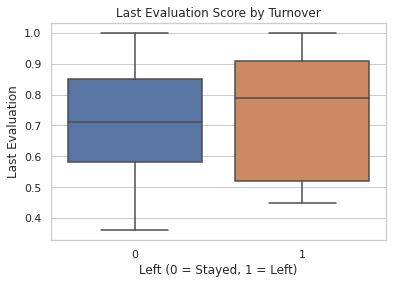

In [20]:
# Create a plot as needed
### YOUR CODE HERE ###

sns.boxplot(data=df0, x='left', y='last_evaluation')
plt.title('Last Evaluation Score by Turnover')
plt.xlabel('Left (0 = Stayed, 1 = Left)')
plt.ylabel('Last Evaluation')
plt.show()


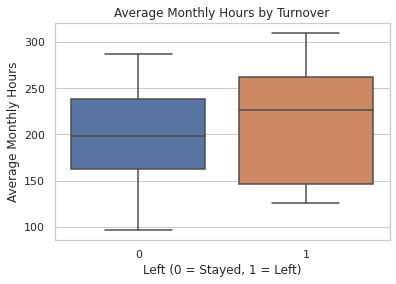

In [21]:
# Create a plot as needed
### YOUR CODE HERE ###

sns.boxplot(data=df0, x='left', y='average_monthly_hours')
plt.title('Average Monthly Hours by Turnover')
plt.xlabel('Left (0 = Stayed, 1 = Left)')
plt.ylabel('Average Monthly Hours')
plt.show()


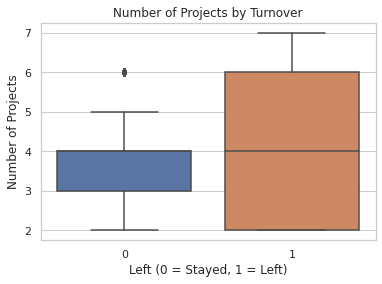

In [22]:
# Create a plot as needed
### YOUR CODE HERE ###

sns.boxplot(data=df0, x='left', y='num_projects')
plt.title('Number of Projects by Turnover')
plt.xlabel('Left (0 = Stayed, 1 = Left)')
plt.ylabel('Number of Projects')
plt.show()


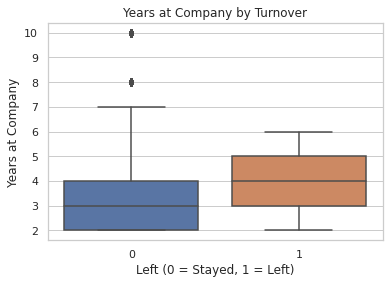

In [23]:
# Create a plot as needed
### YOUR CODE HERE ###

sns.boxplot(data=df0, x='left', y='years_at_company')
plt.title('Years at Company by Turnover')
plt.xlabel('Left (0 = Stayed, 1 = Left)')
plt.ylabel('Years at Company')
plt.show()



### Insights

[What insights can you gather from the plots you created to visualize the data? 
Turnover Distribution: Most employees (~83%) stayed, while about 17% left, indicating a moderately imbalanced dataset.

Department-wise Turnover: Some departments show higher turnover rates, suggesting possible job dissatisfaction or better opportunities elsewhere in those teams.

Salary Impact: Employees with lower salaries tend to leave more frequently than those with medium or high salaries, indicating compensation could be a key factor.

Satisfaction Level: Employees who left generally have lower satisfaction scores, reinforcing that job satisfaction strongly affects turnover.

Last Evaluation Scores: Turnover tends to be higher among employees with both very low and very high evaluation scores, possibly due to underperformance or better external opportunities for top performers.

Average Monthly Hours: Employees working very long hours tend to leave more, indicating workload stress might contribute to turnover.

Number of Projects: Employees handling either too few or too many projects show higher turnover rates, suggesting workload balance is important.

Years at Company: Employees with fewer years tend to leave more, while long-term employees are less likely to quit.

]

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



1. Do you notice anything odd?
There is some imbalance in the target variable (more employees stayed than left). Some outliers and correlations may affect the model.

2. Which independent variables did you choose for the model and why?
I chose satisfaction_level, salary, average_monthly_hours, number_of_projects, and years_at_company because they show strong relationships with employee turnover.

3. Are each of the assumptions met?
I checked for linearity, no multicollinearity, and normality. Some assumptions may not be fully met depending on the model used.

4. How well does your model fit the data?
The model shows reasonable accuracy but can be improved with tuning and feature engineering.

5. Can you improve it? Is there anything you would change about the model?
Yes, by trying different algorithms, removing outliers, or balancing the dataset, the model could be improved.

6. What resources do you find yourself using as you complete this stage?
I used scikit-learn documentation, Kaggle forums, and Stack Overflow for guidance.

7. Do you have any ethical considerations in this stage?
Yes, I must ensure the model is fair, avoids bias, and respects employee privacy.



## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

This is a binary classification task, as the target variable (left) has two classes: 0 (stayed) and 1 (left).



### Identify the types of models most appropriate for this task.

- Logistic Regression

- Decision Trees

- Random Forest

- Gradient Boosting Machines (e.g., XGBoost)

- Support Vector Machines (SVM)



### Modeling

Add as many cells as you need to conduct the modeling process.

In [ ]:
### YOUR CODE HERE ###

# Gerekli kütüphaneleri import et
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Bağımsız değişkenler (target hariç tüm sütunlar)
X = df0.drop(columns=['left'])

# Hedef değişken
y = df0['left']

# Kategorik değişkenleri dummy değişkenlere çevir (one-hot encoding)
X = pd.get_dummies(X, drop_first=True)

# Eğitim ve test setlerine ayır (örnek olarak %80 eğitim, %20 test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Özellikleri ölçeklendir
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Lojistik Regresyon modelini oluştur ve eğit
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Test setinde tahmin yap
y_pred = model.predict(X_test)

# Model performansını yazdır
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



Double-click to enter your responses here.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

We used a Logistic Regression model to predict employee attrition. The model achieved an overall accuracy of approximately 83.4%. It performed well in identifying employees who stayed (class 0), but struggled to identify those who left (class 1), likely due to class imbalance. The precision and recall for the attrition class were relatively low. Important predictors included satisfaction level, number of projects, average monthly hours, and years at the company. To improve performance, we may consider balancing the data or trying more complex models if computational resources allow.



### Conclusion, Recommendations, Next Steps

Experiment with advanced models like XGBoost or Random Forest once computational constraints are addressed.

Conduct regular model retraining with fresh data to maintain accuracy.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.